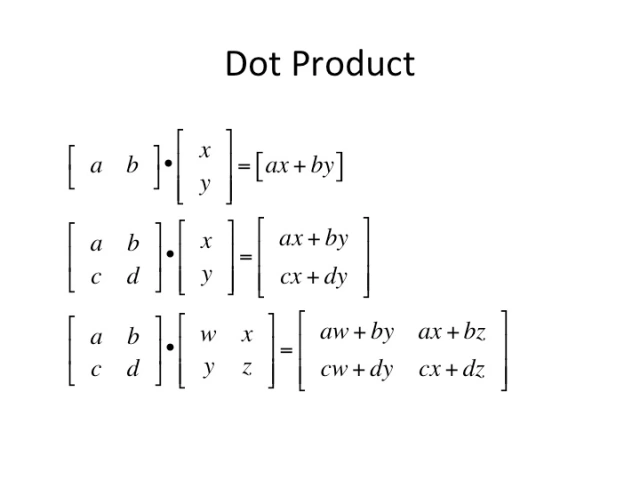

In [1]:
### dot product using numpy
import numpy as np

x = np.array([2,4,6])
y = np.array([3,5,7])

dot = np.dot(x, y)
print(dot)

68


In [2]:
3*2 + 4*5 + 6*7

68

In [3]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[4,5,6], [7,8,9]])

print('Shape of x: ' , x.shape) # Shape of x:  (2, 3) meaning it has 2 rows and 3 columns.
print('Shape of y: ' , y.shape)

Shape of x:  (2, 3)
Shape of y:  (2, 3)


In [4]:
np.dot(x, y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

During dot product the inner dimensions should match

In [5]:
print('Transpose y:',y.T.shape)

Transpose y: (3, 2)


In [6]:
x.shape

(2, 3)

In [7]:
np.dot(x, y.T)

array([[ 32,  50],
       [ 77, 122]])

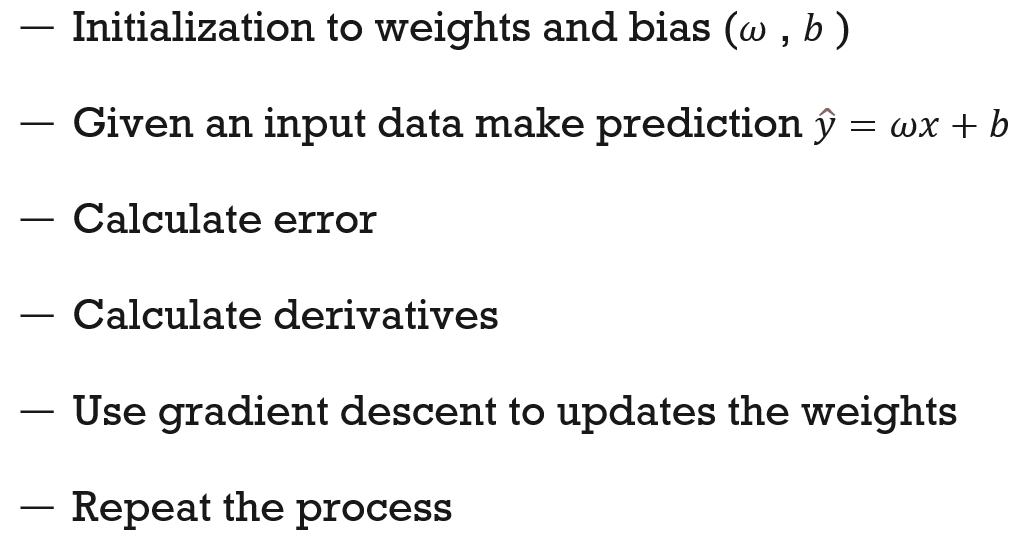

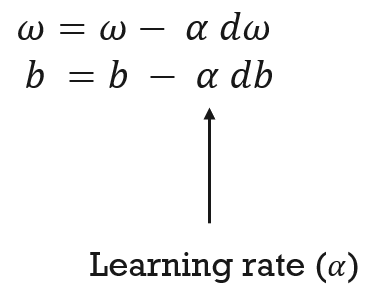

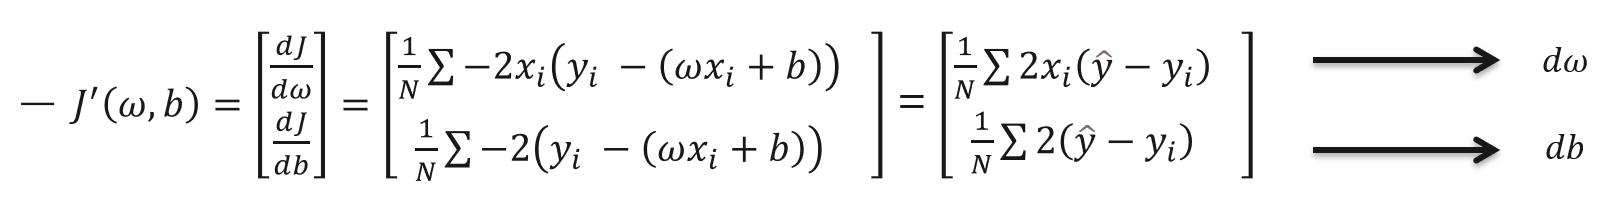

In [8]:
def cal_mse(y_pred, y):
    """
    Calculate the Mean Squared Error (MSE) between predicted and actual values.

    Parameters:
    y_pred (numpy array): Predicted values.
    y (numpy array): Actual values.

    Returns:
    float: Mean Squared Error.
    """
    return np.mean((y_pred - y) ** 2)  # MSE formula: average of squared differences

In [9]:
class LinearRegression:
    """
    A simple implementation of Linear Regression using Gradient Descent.

    Attributes:
    lr (float): Learning rate for gradient descent.
    n_iter (int): Number of iterations for gradient descent.
    weights (numpy array): Coefficients for the features.
    bias (float): Intercept term.
    """

    def __init__(self, lr=0.001, n_iter=1000):
        """
        Initialize the LinearRegression model.

        Parameters:
        lr (float): Learning rate (default is 0.001).
        n_iter (int): Number of iterations (default is 1000).
        """
        self.lr = lr  # Set learning rate
        self.n_iter = n_iter  # Set number of iterations
        self.weights = None  # Initialize weights to None
        self.bias = None  # Initialize bias to None

    def fit(self, X, y):
        """
        Fit the Linear Regression model to the training data using Gradient Descent.

        Parameters:
        X (numpy array): Training data features.
        y (numpy array): Training data target values.
        """
        N, n_features = X.shape  # N: number of samples, n_features: number of features

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)  # Initialize weights as zeros
        self.bias = 0  # Initialize bias as zero

        # Gradient Descent iterations
        for n in range(self.n_iter):
            # Predictions using current weights and bias
            y_hat = np.dot(X, self.weights) + self.bias  # y_hat = X * weights + bias

            # Print MSE every 100 iterations
            if n % 100 == 0:
                print(f'Iteration #:{n} MSE: {cal_mse(y_hat, y)}')

            # Calculate gradients for weights and bias
            dw = (1 / N) * np.dot(X.T, (y_hat - y))  # Derivative of weights
            db = (1 / N) * np.sum(y_hat - y)  # Derivative of bias

            # Update weights and bias using gradient descent
            self.weights = self.weights - self.lr * dw  # Update weights
            self.bias = self.bias - self.lr * db  # Update bias

    def predict(self, X):
        """
        Predict target values for given input features.

        Parameters:
        X (numpy array): Input features.

        Returns:
        numpy array: Predicted target values.
        """
        # Predict using learned weights and bias
        y_pred = np.dot(X, self.weights) + self.bias  # y_pred = X * weights + bias
        return y_pred

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
# Generate synthetic regression dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=100)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Initialize Linear Regression model
regressor = LinearRegression(lr=0.001)

In [13]:
# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
preds = regressor.predict(X_test)

Iteration #:0 MSE: 2047.0819228917364
Iteration #:100 MSE: 1773.4766038516882
Iteration #:200 MSE: 1548.5449214131147
Iteration #:300 MSE: 1363.61059968279
Iteration #:400 MSE: 1211.5470584217396
Iteration #:500 MSE: 1086.50006016482
Iteration #:600 MSE: 983.6600953440196
Iteration #:700 MSE: 899.0755681185441
Iteration #:800 MSE: 829.4994546873259
Iteration #:900 MSE: 772.2634246749749


In [14]:
# Calculate Mean Squared Error on test predictions
mse = cal_mse(preds, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 794.1060686958748


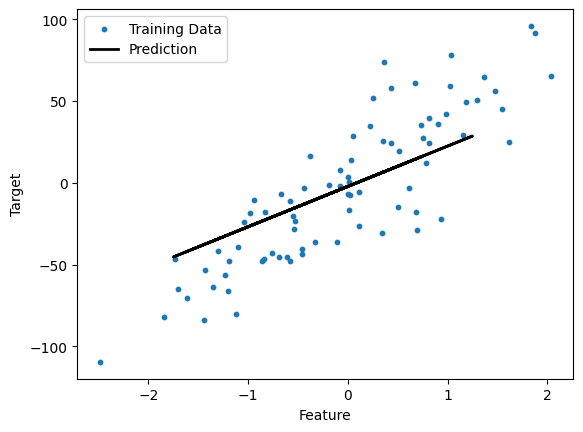

In [16]:
import matplotlib.pyplot as plt
# Plot the training data and the best-fit line
plt.scatter(X_train, y_train, s=10, label='Training Data')  # Scatter plot of training data
plt.plot(X_test, preds, color='black', linewidth=2, label='Prediction')  # Plot the best-fit line
plt.xlabel('Feature')  # X-axis label
plt.ylabel('Target')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot